<a href="https://colab.research.google.com/github/krish6622/ai-ml-projects/blob/main/Random_Forest/Titatanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/ai-ml-projects/Random_Forest/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df=df.dropna(subset=["Survived"])
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y=df['Survived']


In [6]:
X.loc[:,'Sex']=X.loc[:,'Sex'].replace({'male':0,'female':1})
X.loc[:'Age'].fillna(X['Age'].median(),inplace=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [12]:
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)

In [13]:
accuracy=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report)
print(f"Accuracy:{accuracy}")

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Accuracy:0.8044692737430168


In [14]:
sample=X_test.iloc[0:1]
prediction=rf_classifier.predict(sample)


In [15]:
sample_dict=sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")


Sample Passenger: {'Pclass': 3, 'Sex': 0, 'Age': 28.0, 'SibSp': 1, 'Parch': 1, 'Fare': 15.2458}
Predicted Survival: Did Not Survive


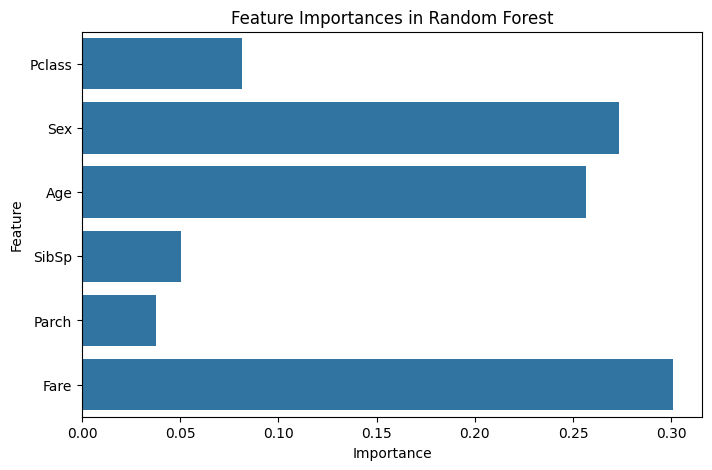

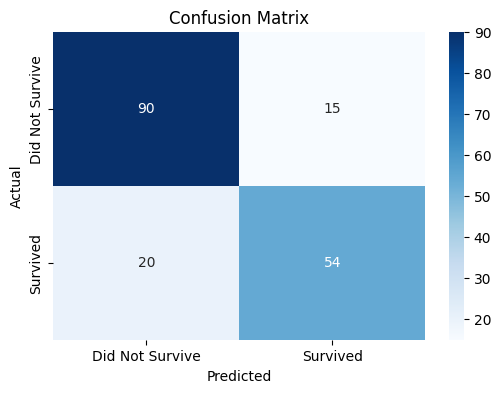

In [20]:
# 1. Feature Importance Plot
importances = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 2. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Did Not Survive", "Survived"],
            yticklabels=["Did Not Survive", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()